In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# index_col is required to be able run methods like diff. Date column is a string and won't work with diff

#eth_df = pd.read_csv('eth.csv', index_col='date')
eth_df = pd.read_csv('eth.csv')
eth_df['date'] = pd.to_datetime(eth_df['date'], utc=True, infer_datetime_format = True)

eth_df = eth_df.sort_values('date', ascending = True)

display(eth_df.head())


,date,open_price,high_price,low_price,close_price,volume,market_cap
803,2015-08-07,2.830000,3.540000,2.520000,2.770000,164329.0,NaN
802,2015-08-08,2.790000,2.800000,0.714725,0.753325,674188.0,167911000.0
801,2015-08-09,0.706136,0.879810,0.629191,0.701897,532170.0,42637600.0
800,2015-08-10,0.713989,0.729854,0.636546,0.708448,405283.0,43130000.0
799,2015-08-11,0.708087,1.130000,0.663235,1.070000,1463100.0,42796500.0


In [3]:
# calculate change in proces
close_price_change = eth_df.diff()

# rename column to be able make join
close_price_change = close_price_change.rename(columns={'close_price': 'close_price_change'})

# add new column to table and select just columns related to close price
cp_df = eth_df.join(close_price_change['close_price_change'])[['date', 'close_price', 'close_price_change']]
display(cp_df.head())

,date,close_price,close_price_change
803,2015-08-07,2.770000,NaN
802,2015-08-08,0.753325,-2.016675
801,2015-08-09,0.701897,-0.051428
800,2015-08-10,0.708448,0.006551
799,2015-08-11,1.070000,0.361552


### Adding new column calculated from other date in row
* Define function that will get row as a argument and return calculation result 
* Apply function using apply method on data frame: my_df.apply(lambda arg_name: cal_function(arg_name), axis = 1)

In [4]:
def close_price_percentage_change(row):
    cp = row['close_price']
    cpc = row['close_price_change']
    
    #prevoiuse price
    pp = cp-cpc
    
    return cpc/pp*100

In [5]:
cp_df['cppc'] = cp_df.apply(lambda row: close_price_percentage_change(row), axis=1)

display(cp_df.head())

,date,close_price,close_price_change,cppc
803,2015-08-07,2.770000,NaN,NaN
802,2015-08-08,0.753325,-2.016675,-72.804152
801,2015-08-09,0.701897,-0.051428,-6.826801
800,2015-08-10,0.708448,0.006551,0.933328
799,2015-08-11,1.070000,0.361552,51.034374


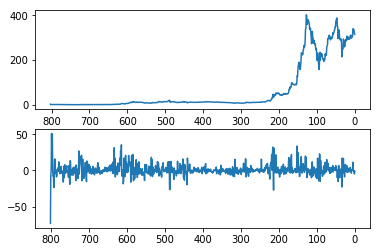

In [6]:
plt.subplot(2, 1, 1)
plt.gca().invert_xaxis()
plt.plot(cp_df['close_price'])

plt.subplot(2, 1, 2)
plt.gca().invert_xaxis()
plt.plot(cp_df['cppc'])

plt.show()

In [7]:
cp_df.describe()

,close_price,close_price_change,cppc
count,804.000000,803.000000,803.000000
mean,63.385285,0.387983,0.945313
std,107.909326,8.202272,8.151820
min,0.434829,-63.200000,-72.804152
25%,5.987500,-0.240000,-2.644223
50%,11.290000,-0.005495,-0.085690
75%,46.305000,0.360776,3.431282
max,401.490000,60.880000,51.034374


### Build in histogram plot
Data frame have build in method to draw histograms. When it's done one have to call plt.show() to display plot.

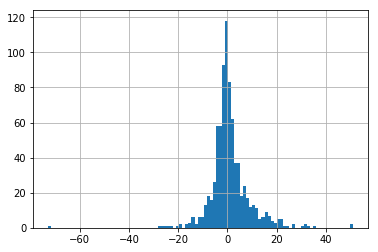

In [8]:
cp_df['cppc'].hist(bins=100)
plt.show()

### Adding series as row to dataframe
Series can be added to data frame as new row. To do this series need to have index setted to the same values as DF columns.

In [9]:
max_index = cp_df.shape[0]

days_df = pd.DataFrame(columns = ['d7', 'd6', 'd5', 'd4', 'd3', 'd2', 'd1', 'next3'])

for i in range(1, max_index-1):
    # sub df containing results for 10 days
    ten_days =  cp_df.iloc[i:i+10]    
    
    # cppc for sevent days
    seven_days = ten_days.iloc[0:7]['cppc']
    three_days = ten_days.iloc[7:10]['cppc']
    
    # there won't be enough data for last rows
    if three_days.shape[0]==3:
    
        sum_of_next_three_days = three_days.sum()
    
        # join days serie with summary cppc for last three
        new_row = seven_days.append(pd.Series([sum_of_next_three_days]))
    
        # replace series index with index the same as df columns
        # other wise series will have index based on original df and
        # will be append as new columns instead of adding values to existing one
        new_row.index=['d7', 'd6', 'd5', 'd4', 'd3', 'd2', 'd1', 'next3']
    
        days_df = days_df.append(new_row, ignore_index = True)
    
    
display(days_df.head())
    

,d7,d6,d5,d4,d3,d2,d1,next3
0,-72.804152,-6.826801,0.933328,51.034374,14.018692,50.000000,0.000000,-38.317744
1,-6.826801,0.933328,51.034374,14.018692,50.000000,0.000000,-7.650273,-39.834137
2,0.933328,51.034374,14.018692,50.000000,0.000000,-7.650273,-7.100592,-17.137215
3,51.034374,14.018692,50.000000,0.000000,-7.650273,-7.100592,-23.566879,22.302679
4,14.018692,50.000000,0.000000,-7.650273,-7.100592,-23.566879,-9.166667,27.359757


### Save result as CSV

In [17]:
# Save result df in csv file
#days_df.to_csv('eth_7days.csv', index = False)

,d7,d6,d5,d4,d3,d2,d1,next3
count,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000
mean,0.948111,1.040854,1.050960,1.050066,1.000127,0.982795,0.918699,2.767284
std,8.186068,7.755246,7.750207,7.750262,7.553019,7.538883,7.335204,13.218416
min,-72.804152,-27.055306,-27.055306,-27.055306,-27.055306,-27.055306,-27.055306,-43.692932
25%,-2.715867,-2.652283,-2.627643,-2.627643,-2.627643,-2.627643,-2.627643,-4.459582
50%,-0.089313,-0.077375,-0.062051,-0.062051,-0.062051,-0.062051,-0.077375,0.747895
75%,3.449686,3.449686,3.449686,3.449686,3.449686,3.433195,3.419009,7.861685
max,51.034374,51.034374,51.034374,51.034374,50.000000,50.000000,35.360360,72.305376


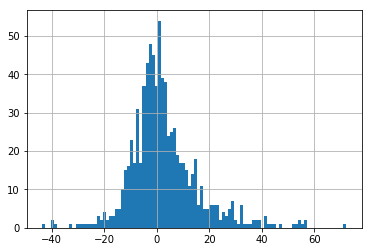

In [15]:
display(days_df.describe())

days_df['next3'].hist(bins=100)
plt.show()

,d7,d6,d5,d4,d3,d2,d1,next3
d7,1.000000,0.085102,0.042463,-0.016144,-0.051932,-0.108671,-0.016516,0.069849
d6,0.085102,1.000000,0.077698,0.044643,0.061931,-0.034182,-0.037645,0.012451
d5,0.042463,0.077698,1.000000,0.077726,0.054354,0.064299,-0.026594,-0.010847
d4,-0.016144,0.044643,0.077726,1.000000,0.079697,0.054501,0.066245,-0.047035
d3,-0.051932,0.061931,0.054354,0.079697,1.000000,0.067336,0.001212,0.010922
d2,-0.108671,-0.034182,0.064299,0.054501,0.067336,1.000000,0.054795,0.031284
d1,-0.016516,-0.037645,-0.026594,0.066245,0.001212,0.054795,1.000000,0.084209
next3,0.069849,0.012451,-0.010847,-0.047035,0.010922,0.031284,0.084209,1.000000


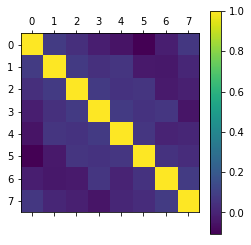

In [11]:
display(days_df.corr())
cax = plt.matshow(days_df.corr())
plt.colorbar(cax)
plt.show()

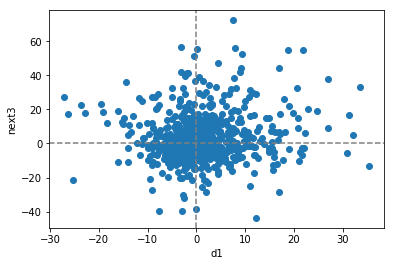

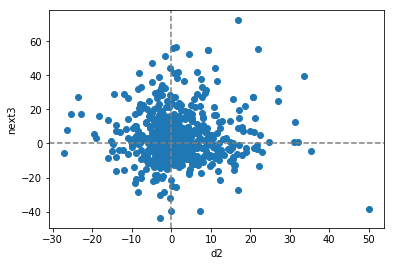

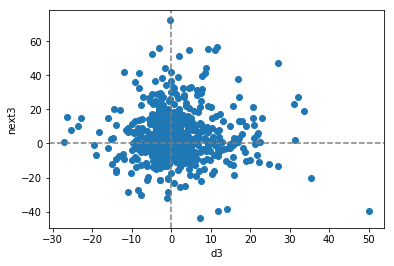

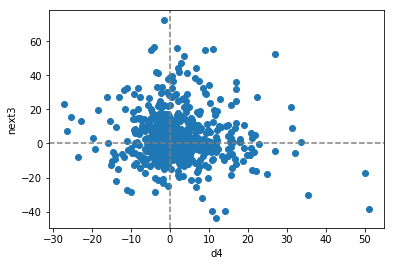

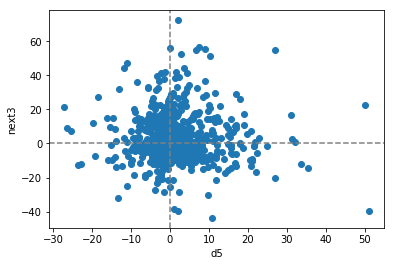

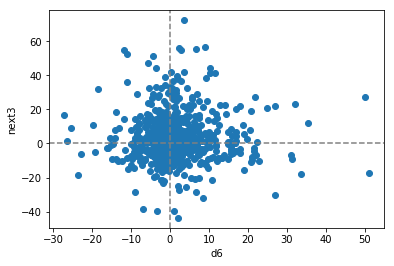

In [14]:
for i in range(1,7):
    col = 'd'+str(i)
    plt.scatter(days_df[col], days_df['next3'])
    plt.axhline(0, color = 'gray', linestyle = 'dashed')
    plt.axvline(0, color = 'gray', linestyle = 'dashed')
    plt.xlabel(col)
    plt.ylabel('next3')
    plt.show()